<a id='begin'></a>
# <p style="background-color:skyblue; font-size:180%; text-align:center; border-radius: 15px 50px;">《黑神话：悟空》b站视频弹幕感情分析 📊</p>

# <p style="background-color:skyblue; font-size:130%; text-align:center; border-radius: 15px 50px;">目录 📇</p>
* [1.数据爬取 🐌](#spi_data)
* [2.数据清洗 📇](#cle_data)
* [3.日均弹幕数分析 📆](#3)
* [4.视频热点时段、词云分析 📈](#4)
* [5.观众情感分析 💖](#5)

In [1]:
import requests
from IPython.display import Image 
import pandas as pd
import jieba
import jieba.analyse
from stylecloud import gen_stylecloud
import re
import datetime
from pyecharts.charts import *
from pyecharts import options as opts
import google.protobuf
import google.protobuf.text_format as text_format
import bili_pb2
from snownlp import SnowNLP
from snownlp import sentiment

<a id='spi_data'></a>
# <p style="background-color:skyblue; font-size:150%; text-align:center; border-radius: 15px 50px;">1.数据爬取 🐌</p>

In [2]:
#cid获取
url = 'https://www.bilibili.com/video/BV1x54y1e7zf?spm_id_from=333.337.search-card.all.click'
res = requests.get(url)
cid = re.findall(r'"cid":(.*?),',res.text)[0]

In [3]:
title = ['id','progress','mode','fontsize','color','midHash','content','ctime','idStr','None']
df = pd.DataFrame()
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:82.0) Gecko/20100101 Firefox/82.0',
    'cookie' : "buvid3=2205BCAD-BA96-73DF-6287-2460351BA66406589infoc; _uuid=889436A9-CA06-E73D-99C1-2E513059D24B07222infoc; rpdid=|(u)~m~J~|)m0J'uYJJRlJm|); LIVE_BUVID=AUTO1916342981210435; video_page_version=v_old_home; CURRENT_BLACKGAP=0; blackside_state=0; i-wanna-go-back=-1; buvid4=2F87D661-DC45-090A-F87E-D47C101D6C5051821-022020516-WCVoMCLv+eqk3YJRItuIDMOXqwLYDFK45kkXJKYH+C1sLGfhJvZOOA%3D%3D; nostalgia_conf=-1; fingerprint=a27d357910334e6ab645e8a1ab8881f8; buvid_fp_plain=undefined; SESSDATA=e442ede8%2C1667973581%2Ce38ad%2A51; bili_jct=f2350a11c2920258cec79354ff65dbec; DedeUserID=476199386; DedeUserID__ckMd5=f1dfeede3432721c; sid=kuxfh15k; buvid_fp=a27d357910334e6ab645e8a1ab8881f8; b_ut=5; hit-dyn-v2=1; PVID=1; bp_video_offset_476199386=662201626853900400; CURRENT_QUALITY=80; CURRENT_FNVAL=4048; b_lsid=C102783F3_180E4A93B44; bsource=search_baidu; b_timer=%7B%22ffp%22%3A%7B%22333.788.fp.risk_2205BCAD%22%3A%22180E4A9431A%22%2C%22333.969.fp.risk_2205BCAD%22%3A%22180E4B15425%22%7D%7D",
}
up_date = '2020-08-20'
date = '2022-05-22'

#根据时间爬取弹幕
while True:
    list_ = []
    comments_url = f"https://api.bilibili.com/x/v2/dm/web/history/seg.so?type=1&oid=226204073&date={date}"
    res = requests.get(url=comments_url, headers = headers)
    res.encoding='utf8'
    data = res.content
    
    #protobuf逆序化处理
    my_seg = bili_pb2.DmSegMobileReply()
    my_seg.ParseFromString(data)
    
    #遍历逆序后的文本，进行数据预处理
    for i in range(len(my_seg.elems)):
        list_1 = text_format.MessageToString(my_seg.elems[i],as_utf8=True).split('\n')
        tem_list = [x.replace('"', '') for x in list_1]#去除双引号
        tem_list = [x.split(':') for x in tem_list if x != ""]#以：分割
        key = [tem_list[x][0] for x in range(len(tem_list))]
        val = [tem_list[x][1] for x in range(len(tem_list))]
        dic_ = dict(zip(key, val))
        list_.append(dic_)
    df_temp = pd.DataFrame(list_)
    df = df.append(df_temp,ignore_index=True)
    min_date = pd.to_datetime(df['ctime'].min(),unit='s', utc=True).strftime('%Y-%m-%d')
    
    #获取每次的最小日期再进行爬取，提高效率
    if min_date == date:
        min_date = (datetime.datetime.strptime(min_date,'%Y-%m-%d')-datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    if min_date == up_date:
        break
    else:
        date = min_date

In [4]:
#另存为csv文件备份
df.to_csv('heiwulong.csv')
df_ = pd.read_csv('heiwulong.csv', index_col=0)
df_.head()

,id,progress,mode,fontsize,color,midHash,content,ctime,idStr,attr,weight
0,1058142309314632448,319539.0,1,25,16777215,f2673622,西游记里面主持看上了唐僧的袈裟，想要防火烧死唐僧,1653231592,1058142309314632448,NaN,NaN
1,1058095099319272960,174717.0,1,25,16777215,df4db9ef,显卡,1653225965,1058095099319272960,NaN,NaN
2,1058094305496935168,82577.0,1,25,16777215,df4db9ef,今天所发生的事要从一只蝙蝠说起,1653225870,1058094305496935168,NaN,NaN
3,1058094059358332160,60057.0,1,25,16777215,df4db9ef,老爹：还有一件事,1653225841,1058094059358332160,NaN,NaN
4,1058068477669104640,299300.0,1,25,16777215,31036faf,这游戏好帅啊,1653222791,1058068477669104640,NaN,NaN


## 属性说明表
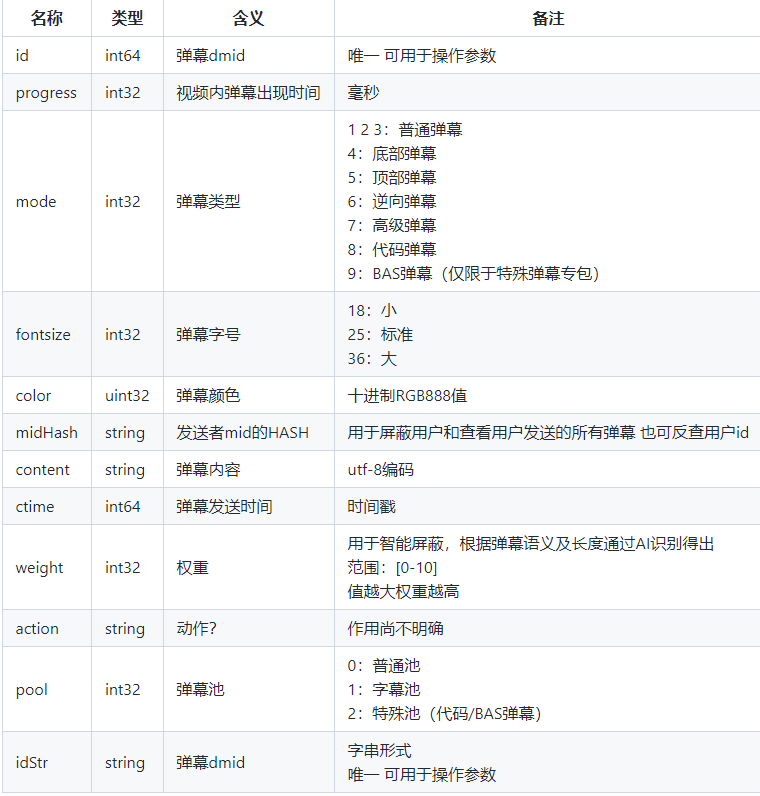

<a id='cle_data'></a>
# <p style="background-color:skyblue; font-size:150%; text-align:center; border-radius: 15px 50px;">2.数据清洗 📇</p>

In [5]:
#去除空格
def Del_space(x):
    if type(x) is str:
        return x.strip()

In [6]:
df_['content'] = df_['content'].apply(Del_space)
df_.duplicated().sum()

3814

In [7]:
#去除重复项
df1 = df_.drop_duplicates(keep='first')
df1.reset_index(drop=True , inplace=True)
df1.head()

,id,progress,mode,fontsize,color,midHash,content,ctime,idStr,attr,weight
0,1058142309314632448,319539.0,1,25,16777215,f2673622,西游记里面主持看上了唐僧的袈裟，想要防火烧死唐僧,1653231592,1058142309314632448,NaN,NaN
1,1058095099319272960,174717.0,1,25,16777215,df4db9ef,显卡,1653225965,1058095099319272960,NaN,NaN
2,1058094305496935168,82577.0,1,25,16777215,df4db9ef,今天所发生的事要从一只蝙蝠说起,1653225870,1058094305496935168,NaN,NaN
3,1058094059358332160,60057.0,1,25,16777215,df4db9ef,老爹：还有一件事,1653225841,1058094059358332160,NaN,NaN
4,1058068477669104640,299300.0,1,25,16777215,31036faf,这游戏好帅啊,1653222791,1058068477669104640,NaN,NaN


<a id='3'></a>
# <p style="background-color:skyblue; font-size:150%; text-align:center; border-radius: 15px 50px;">3.日均弹幕数分析 📆</p>

In [8]:
df1['ctime'] = pd.to_datetime(df1['ctime'],unit='s', utc=True)
df1['发送时间戳'] = df1['ctime'].apply(lambda x:x.strftime('%Y-%m-%d'))#时间格式
df1.head()

<ipython-input-8-4a2510d8709f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ctime'] = pd.to_datetime(df1['ctime'],unit='s', utc=True)
<ipython-input-8-4a2510d8709f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['发送时间戳'] = df1['ctime'].apply(lambda x:x.strftime('%Y-%m-%d'))#时间格式


,id,progress,mode,fontsize,color,midHash,content,ctime,idStr,attr,weight,发送时间戳
0,1058142309314632448,319539.0,1,25,16777215,f2673622,西游记里面主持看上了唐僧的袈裟，想要防火烧死唐僧,2022-05-22 14:59:52+00:00,1058142309314632448,NaN,NaN,2022-05-22
1,1058095099319272960,174717.0,1,25,16777215,df4db9ef,显卡,2022-05-22 13:26:05+00:00,1058095099319272960,NaN,NaN,2022-05-22
2,1058094305496935168,82577.0,1,25,16777215,df4db9ef,今天所发生的事要从一只蝙蝠说起,2022-05-22 13:24:30+00:00,1058094305496935168,NaN,NaN,2022-05-22
3,1058094059358332160,60057.0,1,25,16777215,df4db9ef,老爹：还有一件事,2022-05-22 13:24:01+00:00,1058094059358332160,NaN,NaN,2022-05-22
4,1058068477669104640,299300.0,1,25,16777215,31036faf,这游戏好帅啊,2022-05-22 12:33:11+00:00,1058068477669104640,NaN,NaN,2022-05-22


In [9]:
time_category = df1[['发送时间戳', 'id']].groupby('发送时间戳').count()
time_category.head(10)

,id
发送时间戳,
2020-08-21,1500
2020-08-22,1500
2020-08-23,1500
2020-08-24,1500
2020-08-25,1500
2020-08-26,1500
2020-08-27,1500
2020-08-28,1500
2020-08-29,1689


In [10]:
#折线图
def line_chart(x, y):
    #配置插件，加快pyecharts加载速度
    from pyecharts.globals import CurrentConfig, OnlineHostType
    CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST
    
    #数据赋值
    x_data = x
    y_data = y
    
    #画布设置
    line = Line( 
        init_opts=opts.InitOpts(
            bg_color='#080b30',
            theme='dark',
            width='1000px',
            height='700px'
        )
    )

    #总体美化
    line.set_global_opts(
        #鼠标移动显示数据
        tooltip_opts=opts.TooltipOpts(
            is_show=True,
            trigger='axis',
            is_show_content=True,
            trigger_on='mousemove|click',
            axis_pointer_type='cross',
        ),
        #区域缩放
        datazoom_opts=opts.DataZoomOpts(
            range_start=0,
            range_end=30,
            type_='slider',
            is_zoom_lock=False,
        ),
        #y轴设置
        yaxis_opts=opts.AxisOpts(
            is_show=True,
            axislabel_opts=opts.LabelOpts(
                font_size=13,
                font_weight='bolder'
            )
        ),
        #x轴设置
        xaxis_opts=opts.AxisOpts(
            axislabel_opts=opts.LabelOpts(
                font_size=13,
                font_weight='bolder'
            ),
        ),
    )

    #载入数据
    line.add_xaxis(x_data)
    line.add_yaxis('',
                   y_data,
                   is_symbol_show=False,
                   is_smooth=True,
                   #线条颜色、阴影
                   linestyle_opts={
                       "normal":{
                           "color": "#44B2BE",
                           "shadowColor": '#44B2BE60',
                           "shadowBlur": 8,
                           "shadowOffsetY": 8,
                           "shadowOffsetX": 8,
                           "width": 5 #线粗
                       },
                   },
    )

    #画图
    return(line)

In [11]:
x = time_category.index.tolist()
y = time_category['id'].tolist()
line = line_chart(x,y)
line.render_notebook()

#### 从整体数据来看，有明显的3个峰值，对应的时间和弹幕数量为：2020-08-29（1689）、2021-02-09(879)、2021-08-20(1772)
#### 视频上传日期为2020-8-20，在发布后的持续一周时间内，弹幕数维持在每日1500，经查阅资料发现此为B站限制：

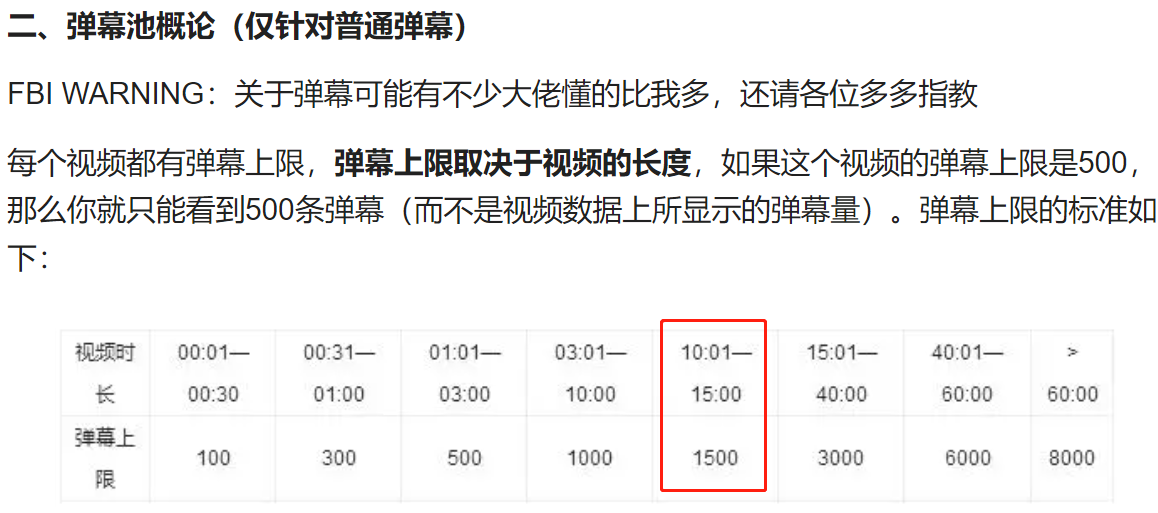

#### 抱着好奇的心态针对超过1500的峰值数据进行查看，发现2021-08-20的普通弹幕数居然大于1500？
#### 查阅资料后发现，从2021开始，b站弹幕数进行了翻倍............

In [12]:
#弹幕类型1、2、3为普通弹幕
normal_dms1 = df1[(df1['发送时间戳']=='2020-08-29')]['mode'].isin({'1', '2', '3'}).sum()
normal_dms2 = df1[(df1['发送时间戳']=='2021-02-09')]['mode'].isin({'1', '2', '3'}).sum()
normal_dms3 = df1[(df1['发送时间戳']=='2021-08-20')]['mode'].isin({'1', '2', '3'}).sum()
print("普通弹幕数：",normal_dms1,normal_dms2, normal_dms3)

普通弹幕数： 0 0 0


#### 2020-08-29的峰值，是因为热门推荐
#### 2021-02-09的峰值暂不知原因
#### 2021-08-20的峰值，是因为发布了第二段实机演示，且上了热门，第二批人很有可能就是第一批看的人？：
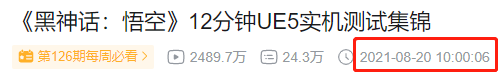

<a id='4'></a>
# <p style="background-color:skyblue; font-size:150%; text-align:center; border-radius: 15px 50px;">4.视频热点时段、词云分析 📈</p>

In [14]:
#视频时间段分析
progress_category=pd.DataFrame()
progress_category[['id', 'progress','content']] = df1[['id', 'progress','content']]
progress_category.fillna("0", inplace=True)
progress_category['progress_new'] = progress_category['progress'].astype('int')//1000
progress_count = progress_category.groupby('progress_new')['id'].count()
progress_count[:10]

progress_new
0    381
1    200
2    189
3    187
4    209
5    225
6    206
7    258
8    244
9    220
Name: id, dtype: int64

In [15]:
p_x = progress_count.index.tolist()
p_y = progress_count.values.tolist()
line2 = line_chart(p_x, p_y)
line2.set_series_opts(
    markline_opts=opts.MarkLineOpts(
        data = [opts.MarkLineItem(type_='average', name = '平均值')]
))
line2.render_notebook()

#### 上图可以看出，一共775秒的视频，每秒弹幕数在70左右；几个明显的峰值在0-69s、288-300s、640-665s、692-775s

In [16]:
#词云图
def words_cloud(x):
    text = x
    wordlist = jieba.cut_for_search(''.join(text))
    result = ' '.join(wordlist)
    gen_stylecloud(text=result,
                    icon_name='fas fa-cloud',
                    font_path='msyh.ttc',
                    background_color='white',
                    output_name='ciyun.jpg',
                    custom_stopwords=['你', '我', '他', '的', '了', '这','啊', '看', '是', '吧', '吗', '这个', '就', '都', '游戏', '也', '有', '不',
                                     '在', '就是', '要', '又', '应该', '说', '不是','像']
                   )
    return(Image('ciyun.jpg'))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\gan123\AppData\Local\Temp\jieba.cache
Loading model cost 1.123 seconds.
Prefix dict has been built successfully.


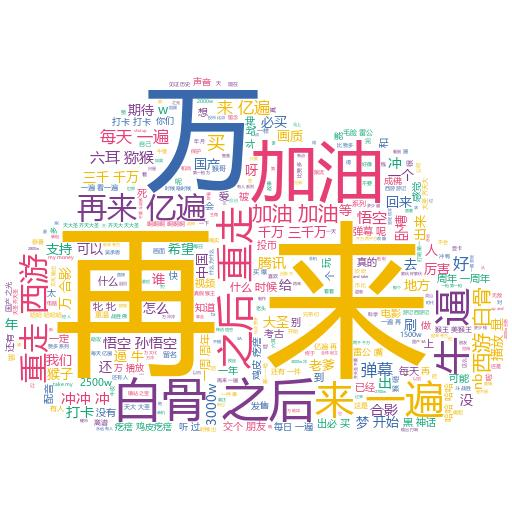

In [18]:
peak_text = pd.DataFrame()
peak_text[['progress', 'content']] = progress_category[['progress_new', 'content']]
peak_text['progress'] = peak_text['progress'].astype('int')
peak_text1 = peak_text[peak_text['progress']<69]['content'].tolist()
peak_text2 = peak_text.query('progress>=288&progress<=300')['content'].tolist()
peak_text3 = peak_text.query('progress>=640&progress<=665')['content'].tolist()
peak_text4 = peak_text.query('progress>=692&progress<=775')['content'].tolist()
words_cloud(peak_text1)

#### 从0-69s的词云图中不难发现，此时的弹幕基本为二刷或者多刷时的留言

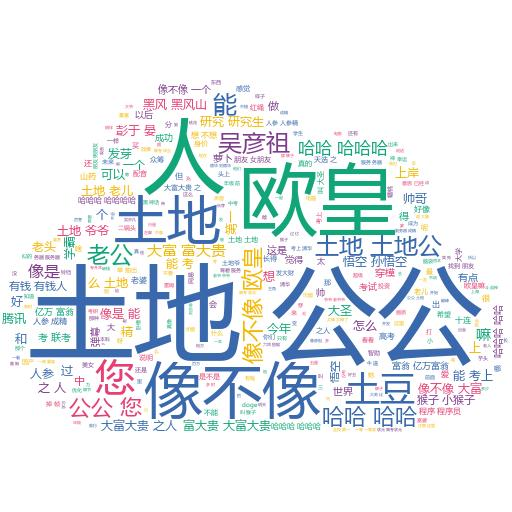

In [19]:
words_cloud(peak_text2)

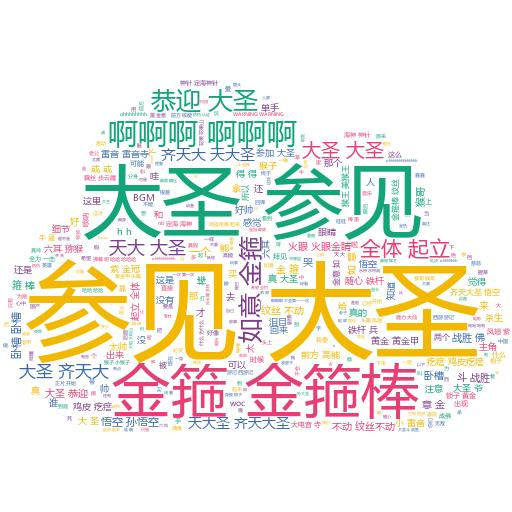

In [20]:
words_cloud(peak_text3)

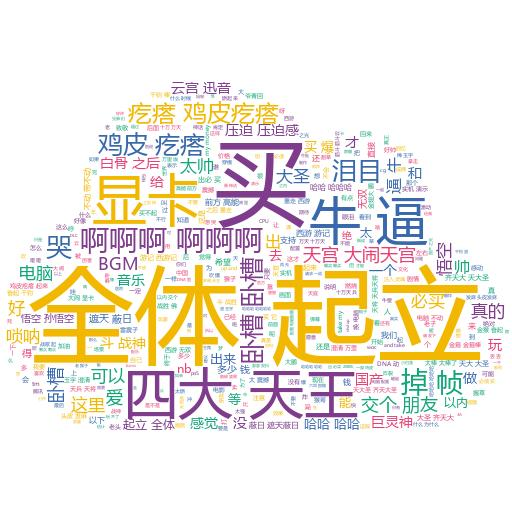

In [21]:
words_cloud(peak_text4)

#### 对于后面3段的峰值，多数是与其视频内容相关，说明此处的游戏设计是让人眼前一亮的

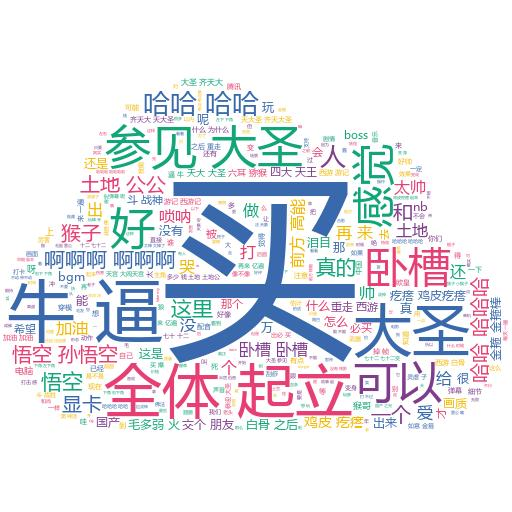

In [22]:
#总体词云
text = df1['content'].tolist()
words_cloud(text)

#### 从词云图不难发现，大家对《黑神话：悟空》的总体期待值和赞赏程度是很高的

<a id='5'></a>
# <p style="background-color:skyblue; font-size:150%; text-align:center; border-radius: 15px 50px;">5.观众情感分析 💖</p>

In [37]:
#直方图
def bar_chart(x, y):
    x_data = x
    y_data = y
    
    #主题颜色
    bar = Bar(
        init_opts=opts.InitOpts(
            bg_color='#080b30',
            theme='dark',
            width='1000px',
            height='700px')
    )
    
    #输入载入
    bar.add_xaxis(x)
    bar.add_yaxis("", y)
    bar.set_colors("#44B2BE")
    
    bar.set_series_opts(
        label_opts=opts.LabelOpts(is_show=False))
    
    #输出
    return(bar)

In [33]:
dms_count = df.groupby('midHash')['id'].count().sort_values(ascending = False)
top_20 = pd.DataFrame(dms_count[:20])
avg_count = pd.DataFrame(dms_count).mean()
print('人均弹幕数：',avg_count.values)

人均弹幕数： [1.67828557]


In [38]:
x = top_20.index.to_list()
y = top_20['id'].to_list()
bar_top20 = bar_chart(x, y)
bar_top20.set_series_opts(
    markpoint_opts=opts.MarkPointOpts(
        data=[opts.MarkPointItem(type_="max", name="最大值")])
)
bar_top20.render_notebook()

#### 在人均1.6条弹幕的大环境下，一位大哥一人怒发306条弹幕，以一己之力拉高了平均水平，抱着好奇的心态看看他发了什么：

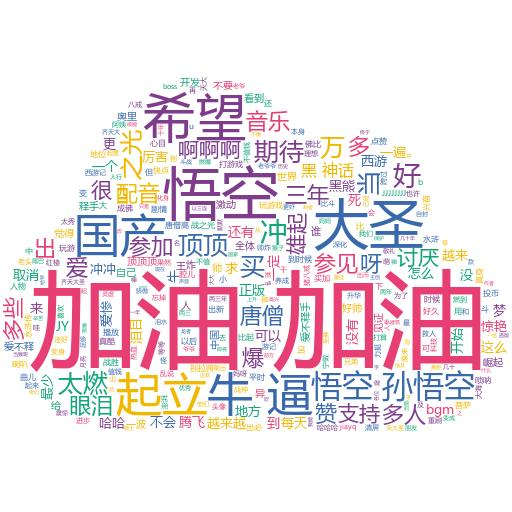

In [27]:
us_id = top_20.index.tolist()[0]
text = df[df['midHash'] == us_id]['content'].tolist()
words_cloud(text)

#### 真爱粉无疑了！！！（水军？不可能，绝对不可能

In [28]:
texts = ';'.join(df1['content'].tolist())
cut_text = " ".join(jieba.cut(texts))
keywords = jieba.analyse.extract_tags(cut_text, topK=5000, withWeight=True, allowPOS=('a','e','n','nr','ns'))

In [29]:
ss = pd.DataFrame(keywords,columns = ['词语','重要性'])
ss.head()

,词语,重要性
0,卧槽,0.361237
1,大圣,0.290395
2,游戏,0.231794
3,啊啊啊,0.215174
4,悟空,0.108812


In [30]:
ss_top20 = ss.iloc[:20]
ss_top20 = ss_top20.sort_values('重要性')
ss_top20['重要性'] = ss_top20['重要性'].apply(lambda x: format(x, '.2'))

In [39]:
x = ss_top20['词语'].to_list()
y = ss_top20['重要性'].to_list()
bar_affect = bar_chart(x, y)
bar_affect.reversal_axis() 
bar_affect.set_series_opts(label_opts=opts.LabelOpts(position='right'))
bar_affect.render_notebook()

#### 中国人都懂“卧槽”两个字的含金量吧

In [40]:
ss_bottom = ss.iloc[-20:]
ss_bottom

,词语,重要性
4980,太玄,0.000202
4981,卷云,0.000202
4982,真丝,0.000202
4983,表演性,0.000202
4984,禅心,0.000202
4985,普度,0.000202
4986,每颗,0.000202
4987,甘拜下风,0.000202
4988,甘雨,0.000202
4989,轻舟,0.000202


In [41]:
def sentiment(content):
    s = SnowNLP(content)
    return s.sentiments

In [42]:
df['content'] = df['content'].fillna("")

In [43]:
df1['sentiment'] = df['content'].apply(sentiment)

<ipython-input-43-556043d0464b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment'] = df['content'].apply(sentiment)


In [44]:
df_sentiment = df1[['content', 'sentiment']]
df_sentiment['sentiment'] = df_sentiment['sentiment'].astype('float').apply(lambda x: format(x, '.4f'))
df_sentiment.head()

<ipython-input-44-1b1562d91944>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment'] = df_sentiment['sentiment'].astype('float').apply(lambda x: format(x, '.4f'))


,content,sentiment
0,西游记里面主持看上了唐僧的袈裟，想要防火烧死唐僧,0.9948
1,显卡,0.5551
2,今天所发生的事要从一只蝙蝠说起,0.2727
3,老爹：还有一件事,0.5865
4,这游戏好帅啊,0.6943


In [45]:
df_sentiment['sentiment'].astype('float').mean()

0.5821196887686149

#### 总体来看，积极的弹幕是占多数的，接下来再展开看看两方的代表性弹幕：

In [46]:
df_sentiment.sort_values('sentiment')[-20:]

,content,sentiment
22599,棒击大地,1.0000
25257,四百块不能再多了,1.0000
2440,音乐太棒了,1.0000
25139,妖怪！俺是你爷爷！孙悟空,1.0000
54119,？？？一般配置直接抬走啊,1.0000
24954,暂停可以看见猴哥石化了，这是金刚不坏,1.0000
24953,挥动武器是为了让火烧得更猛烈吧,1.0000
24842,出来必买！,1.0000
24301,如果这游戏成功，大家愿不愿意每人至少买两份这游戏？至少我愿意,1.0000
23785,这是西游结束了把,1.0000


#### 根据snownlp分类后，接近1的弹幕，内容确实挺积极的

In [47]:
df_sentiment.sort_values('sentiment')[:20]

,content,sentiment
19974,这天宫，我坐不得？,0.0000
19973,徒弟你看我像不像大富大贵子,0.0000
19964,我觉得可以在增强一下打击感,0.0000
19975,呔，这猴子，吃我太原火焰刀！,0.0000
19841,这立体音效，爱了爱了。,0.0000
19828,刮痧,0.0000
53180,合影,0.0000
19965,这特么是魂味，还原神味,0.0000
15749,不识相的,0.0000
19967,美盾质感,0.0000


#### 但是对于消极的弹幕分类的好像不时很准确，但是还是能看出像“魂”、“元神”等字眼，下面对其进行查看

In [56]:
df_sentiment[df_sentiment['content'].str.contains('魂')]

,content,sentiment
6,一瞬间，感觉灵魂在燃烧,0.9922
76,这个条，魂类游戏即视感,0.8178
187,唢呐果然是灵魂,0.8901
299,玩过魂系仁王的表示似曾相识,0.9987
584,魂类游戏血条不都在下面吗,0.7693
...,...,...
53760,黑魂,0.0001
54040,说四百以下能接受，三百以内卖的，黑魂战神4出来的时候多少钱不知道吗？,0.4013
54202,魂孝子这么多？,0.8364
54332,黑魂话：悟空,0.7879


#### 可以看到，有些观众认为《黑神话：悟空》是类似魂类游戏的存在，部分引战的弹幕sentiment居然高达0.8~0.9？

In [51]:
df_sentiment[df_sentiment['content'].str.contains('原神')]

,content,sentiment
615,那个说画质没原神好的，你是哪个精神病院跑出来的,0.4795
4006,看来又一款原神要出世了,0.2500
5894,希望别烂尾，另外如果对显卡要求太高，流行不起来的。希望你能是中国的第二个原神,0.4738
7365,制作比原神还精良很多，不过好奇它后续主打玩法,0.5735
13292,我真的不想玩开放世界了，被原神搞得审美疲劳了（不是说不好，我得换换口味）,0.2493
19965,这特么是魂味，还原神味,0.0000
19969,原神内味,0.0001
21198,原神悟空,0.1555
21301,TGA年度最佳要被原神抢先了,0.4566
21319,丘你妹，原神滚,0.1920


#### 对于原神方面的弹幕，似乎都是批评向的，sentiment数据大多小于0.5，较为准确

<a id='6'></a>
# <p style="background-color:skyblue; font-size:150%; text-align:center; border-radius: 15px 50px;">6.总结 🎮</p>

#### 1、从整体的弹幕内容来看，观众对《黑神话：悟空》的实机演示是非常赞赏的
#### 2、视频中有4处弹幕峰值，且弹幕大多是积极性的，说明该处是观众受到观众的喜欢，可以对这些游戏内容进行增强和保留
#### 3、在出第二次实机演示时，这一视频的弹幕数达到历史新高，可以说《黑悟空：神话》聚集了大量粉丝，有望打造一个新IP
#### 4、虽然获得了多数好评，但一些观众还是认为内容像魂类游戏，如何突破魂类印象可能是需要重点关注的地方，此外更有“原神”党的存在

In [57]:
df_sentiment[df_sentiment['content'].str.contains('腾讯')]

,content,sentiment
37,腾讯就像是毒瘤，侵蚀着玩家与游戏,0.2566
217,远离腾讯还有网易！,0.3028
218,原理腾讯！还有网易！,0.8960
569,腾讯∶只要你想出国产单机，我老马一定咂咂场子,0.1362
756,腾讯代理就好了~~~哈哈 大家都是这么想的呢？？？？？？？？？,0.3952
...,...,...
52702,弹幕里开始出现了腾讯狗，大家见谅。,0.3105
52710,弹幕里出现了腾讯狗，大家见谅。,0.6003
53840,腾讯你后悔了吗？,0.4188
53871,腾讯你后悔了吗？,0.2524


#### 5、最后，怀着求知的心态，查看了跟企鹅相关的弹幕，其弹幕数甚至超过了魂类弹幕，而且大多数为负面评价，看来企鹅的反面形象是坐牢了